In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# import data from dataset
df = pd.read_csv('./datasets/liga-mx-generales.csv')
df.head()

,ID,Equipo,Origen,Entrenador,Ciudad,Estado,Estadio,Latitud,Longitud,Capacidad,Fundación,Filiación,Patrocinador,Kit,Kit_Origen
0,11,Pachuca,Uruguay,Paulo Pezzolano,Pachuca,Hidalgo,Hidalgo,20.105014,-98.756236,30000,1892,1943,Cementos Fortaleza,Charly,Mexicana
1,5,Chivas,Mexico,Víctor Manuel Vucetich,Guadalajara,Jalisco,Akron,20.681435,-103.462688,49850,1906,1943,Caliente,Puma,Alemana
2,1,América,Argentina,Santiago Solari,Distrito Federal,Distrito Federal,Azteca,19.302415,-99.150517,87000,1916,1943,AT&T,Nike,USA
3,2,Atlas,Argentina,Diego Cocca,Guadalajara,Jalisco,Jalisco,20.704674,-103.328188,56713,1916,1943,Banco Azteca,Charly,Mexicana
4,17,Toluca,Uruguay,Hernán Cristante,Toluca,Estado de México,Nemesio Díez,19.287522,-99.666798,30000,1917,1943,Tolucafc,Under Armour,USA


In [3]:
df.rename(columns={'Fundación':'Fundacion'}, inplace=True)
df.rename(columns={'Filiación':'Filiacion'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            18 non-null     int64  
 1   Equipo        18 non-null     object 
 2   Origen        18 non-null     object 
 3   Entrenador    18 non-null     object 
 4   Ciudad        18 non-null     object 
 5   Estado        18 non-null     object 
 6   Estadio       18 non-null     object 
 7   Latitud       18 non-null     float64
 8   Longitud      18 non-null     float64
 9   Capacidad     18 non-null     int64  
 10  Fundacion     18 non-null     int64  
 11  Filiacion     18 non-null     int64  
 12  Patrocinador  18 non-null     object 
 13  Kit           18 non-null     object 
 14  Kit_Origen    18 non-null     object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.2+ KB


In [4]:
import time
year, month, day, hour, min = map(int, time.strftime("%Y %m %d %H %M").split())
year

2021

In [5]:
df['Años'] = year
df['Años']

0     2021
1     2021
2     2021
3     2021
4     2021
5     2021
6     2021
7     2021
8     2021
9     2021
10    2021
11    2021
12    2021
13    2021
14    2021
15    2021
16    2021
17    2021
Name: Años, dtype: int64

In [6]:
df['Años Primera'] = df.apply(lambda x: x['Años'] - x['Filiacion'], axis=1)
df['Años Primera']

0     78
1     78
2     78
3     78
4     78
5     78
6     57
7     78
8     78
9     76
10    71
11    59
12    48
13    33
14    10
15     2
16     5
17     1
Name: Años Primera, dtype: int64

In [7]:
df['Cuenta'] = 1
df.head()

,ID,Equipo,Origen,Entrenador,Ciudad,Estado,Estadio,Latitud,Longitud,Capacidad,Fundacion,Filiacion,Patrocinador,Kit,Kit_Origen,Años,Años Primera,Cuenta
0,11,Pachuca,Uruguay,Paulo Pezzolano,Pachuca,Hidalgo,Hidalgo,20.105014,-98.756236,30000,1892,1943,Cementos Fortaleza,Charly,Mexicana,2021,78,1
1,5,Chivas,Mexico,Víctor Manuel Vucetich,Guadalajara,Jalisco,Akron,20.681435,-103.462688,49850,1906,1943,Caliente,Puma,Alemana,2021,78,1
2,1,América,Argentina,Santiago Solari,Distrito Federal,Distrito Federal,Azteca,19.302415,-99.150517,87000,1916,1943,AT&T,Nike,USA,2021,78,1
3,2,Atlas,Argentina,Diego Cocca,Guadalajara,Jalisco,Jalisco,20.704674,-103.328188,56713,1916,1943,Banco Azteca,Charly,Mexicana,2021,78,1
4,17,Toluca,Uruguay,Hernán Cristante,Toluca,Estado de México,Nemesio Díez,19.287522,-99.666798,30000,1917,1943,Tolucafc,Under Armour,USA,2021,78,1


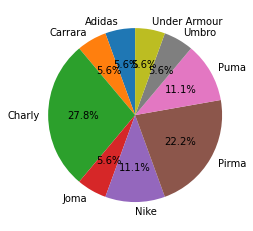

In [8]:
df_g = df.groupby(['Kit'])['Cuenta'].sum().reset_index()
sizes = df_g['Cuenta']
labels = df_g['Kit']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()


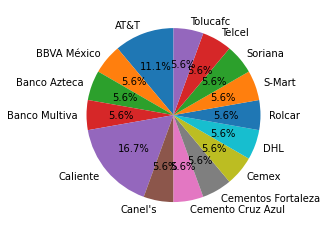

In [9]:
df_g = df.groupby(['Patrocinador'])['Cuenta'].sum().reset_index()
sizes = df_g['Cuenta']
labels = df_g['Patrocinador']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

In [10]:
df.to_csv('./datasets/liga_mx_generales.csv')

In [11]:
# import data from dataset
df2 = pd.read_csv('./datasets/liga-mx-campeonatos.csv')
df2.head()

,Temporada,Torneo,Equipo
0,2020/2021,Clausura,Cruz Azul
1,2020/2021,Apertura,León
2,2019/2020,Clausura,No Champion
3,2019/2020,Apertura,Monterrey
4,2018/2019,Clausura,Tigres


In [11]:
df2['Torneos'] = 1
df2.head()

,Temporada,Torneo,Equipo,Torneos
0,2020/2021,Clausura,Cruz Azul,1
1,2020/2021,Apertura,León,1
2,2019/2020,Clausura,No Champion,1
3,2019/2020,Apertura,Monterrey,1
4,2018/2019,Clausura,Tigres,1


In [12]:
df2['Equipo'].unique()

array(['Cruz Azul', 'León', 'No Champion', 'Monterrey', 'Tigres',
       'América', 'Santos', 'Chivas', 'Pachuca', 'Tijuana', 'Pumas',
       'Toluca', 'Atlante', 'Morelia', 'Necaxa', 'UAG Tecos', 'Puebla',
       'Oro', 'Zacatepec', 'Marte', 'TM', 'Atlas', 'Veracruz', 'España',
       'Asturias'], dtype=object)

In [13]:
equipos_actuales = ['Cruz Azul', 'América', 'Puebla', 'Monterrey', 'Santos', 'León',
       'Atlas', 'Pachuca', 'Chivas', 'Tigres', 'Toluca', 'Querétaro',
       'Mazatlán', 'Tijuana', 'Pumas', 'Juárez', 'San Luis', 'Necaxa']
equipos_actuales       

['Cruz Azul',
 'América',
 'Puebla',
 'Monterrey',
 'Santos',
 'León',
 'Atlas',
 'Pachuca',
 'Chivas',
 'Tigres',
 'Toluca',
 'Querétaro',
 'Mazatlán',
 'Tijuana',
 'Pumas',
 'Juárez',
 'San Luis',
 'Necaxa']

In [14]:
df2_vig = df2.loc[df2['Equipo'].isin(equipos_actuales)]
df2_vig['Equipo'].unique()

array(['Cruz Azul', 'León', 'Monterrey', 'Tigres', 'América', 'Santos',
       'Chivas', 'Pachuca', 'Tijuana', 'Pumas', 'Toluca', 'Necaxa',
       'Puebla', 'Atlas'], dtype=object)

In [15]:
data = df2_vig.groupby(['Equipo'])['Torneos'].sum().reset_index().sort_values(by='Torneos', ascending=False)
data

,Equipo,Torneos
0,América,13
2,Chivas,12
13,Toluca,10
3,Cruz Azul,9
4,León,8
9,Pumas,7
11,Tigres,7
7,Pachuca,6
10,Santos,6
5,Monterrey,5


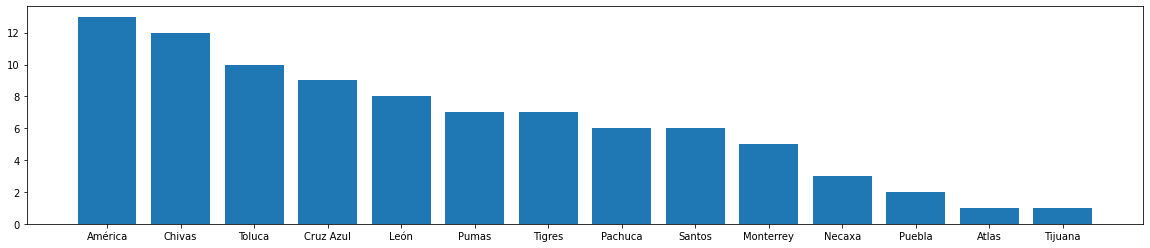

In [16]:
df_g = df2_vig.groupby(['Equipo'])['Torneos'].sum().reset_index().sort_values(by='Torneos', ascending=False)
x = df_g['Equipo']
y = df_g['Torneos']
fig, ax = plt.subplots(figsize=(20,4))
ax.bar(x, y)
plt.show()

In [287]:
df2_vig.to_csv('./datasets/liga_mx_campeones.csv')

In [17]:
# import data from dataset
df3 = pd.read_csv('./datasets/liga-mx-temporadas.csv')
df3.head()

,Temporada,Año,Posición,Equpo,Puntos,PJ,PG,PE,PP,GF,GC
0,2021-2022,2021,1,Cruz Azul,41,17,13,2,2,26,11
1,2021-2022,2021,2,América,38,17,12,2,3,26,14
2,2021-2022,2021,3,Puebla,28,17,7,7,3,25,14
3,2021-2022,2021,4,Monterrey,28,17,8,4,5,22,13
4,2021-2022,2021,5,Santos,26,17,7,5,5,18,13


In [18]:
df3.rename(columns={'Equpo':'Equipo'}, inplace=True)
df3.rename(columns={'Posición':'Posicion'}, inplace=True)
df3['GT'] = df3['GF'] + df3['GC']
df3.head()

,Temporada,Año,Posicion,Equipo,Puntos,PJ,PG,PE,PP,GF,GC,GT
0,2021-2022,2021,1,Cruz Azul,41,17,13,2,2,26,11,37
1,2021-2022,2021,2,América,38,17,12,2,3,26,14,40
2,2021-2022,2021,3,Puebla,28,17,7,7,3,25,14,39
3,2021-2022,2021,4,Monterrey,28,17,8,4,5,22,13,35
4,2021-2022,2021,5,Santos,26,17,7,5,5,18,13,31


In [19]:
equipos_actuales = ['Cruz Azul', 'América', 'Puebla', 'Monterrey', 'Santos', 'León',
       'Atlas', 'Pachuca', 'Chivas', 'Tigres', 'Toluca', 'Querétaro',
       'Mazatlán', 'Tijuana', 'Pumas', 'Juárez', 'San Luis', 'Necaxa']
equipos_actuales       

['Cruz Azul',
 'América',
 'Puebla',
 'Monterrey',
 'Santos',
 'León',
 'Atlas',
 'Pachuca',
 'Chivas',
 'Tigres',
 'Toluca',
 'Querétaro',
 'Mazatlán',
 'Tijuana',
 'Pumas',
 'Juárez',
 'San Luis',
 'Necaxa']

In [20]:
df3_vig = df3.loc[df3['Equipo'].isin(equipos_actuales)]
df3_vig['Equipo'].unique()

array(['Cruz Azul', 'América', 'Puebla', 'Monterrey', 'Santos', 'León',
       'Atlas', 'Pachuca', 'Chivas', 'Tigres', 'Toluca', 'Querétaro',
       'Mazatlán', 'Tijuana', 'Pumas', 'Juárez', 'San Luis', 'Necaxa'],
      dtype=object)

In [37]:
equipos_analisis = ['Santos','América','Cruz Azul']
df3_g = df3_vig.loc[df3_vig['Equipo'].isin(equipos_analisis)].sort_values(by='Temporada')
df3_g

,Temporada,Año,Posicion,Equipo,Puntos,PJ,PG,PE,PP,GF,GC,GT
222,2009-2010,2009,6,Santos,27,17,7,6,4,29,24,53
220,2009-2010,2009,4,América,30,17,8,6,3,29,16,45
219,2009-2010,2009,3,Cruz Azul,33,17,11,0,6,35,19,54
202,2010-2011,2010,4,América,27,17,7,6,4,22,16,38
201,2010-2011,2010,3,Santos,30,17,9,3,5,28,19,47
199,2010-2011,2010,1,Cruz Azul,39,17,12,3,2,33,13,46
197,2011-2012,2011,17,América,15,17,3,6,8,26,31,57
184,2011-2012,2011,4,Santos,27,17,8,3,6,29,25,54
182,2011-2012,2011,2,Cruz Azul,29,17,8,5,4,21,14,35
166,2012-2013,2012,4,América,31,17,8,7,2,28,15,43


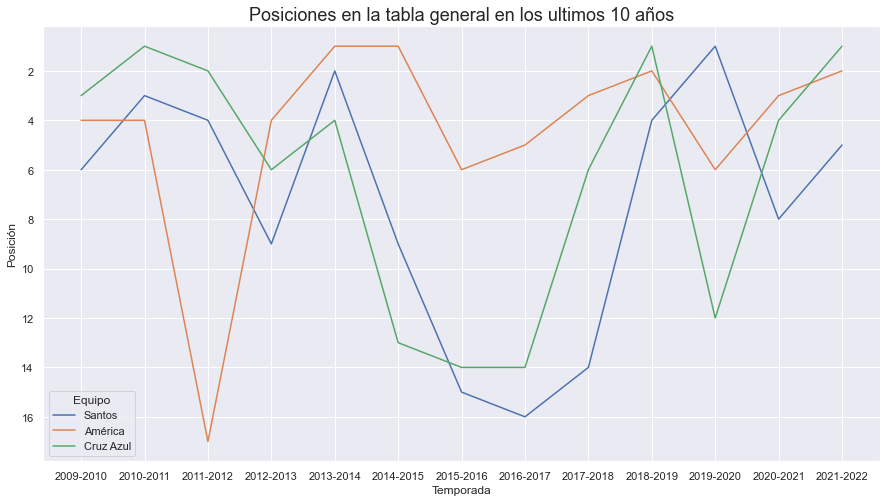

In [42]:
# Posición por jornada
sns.set(rc={'figure.figsize': (15, 8)})
ax = sns.lineplot(x='Temporada', y='Posicion', hue='Equipo', data=df3_g)
ax.set_title('Posiciones en la tabla general en los ultimos 10 años', fontsize=18)
ax.invert_yaxis()
ax.set(xlabel='Temporada', ylabel="Posición")
fig = ax.get_figure()
fig.savefig("Analisis10Años.png");


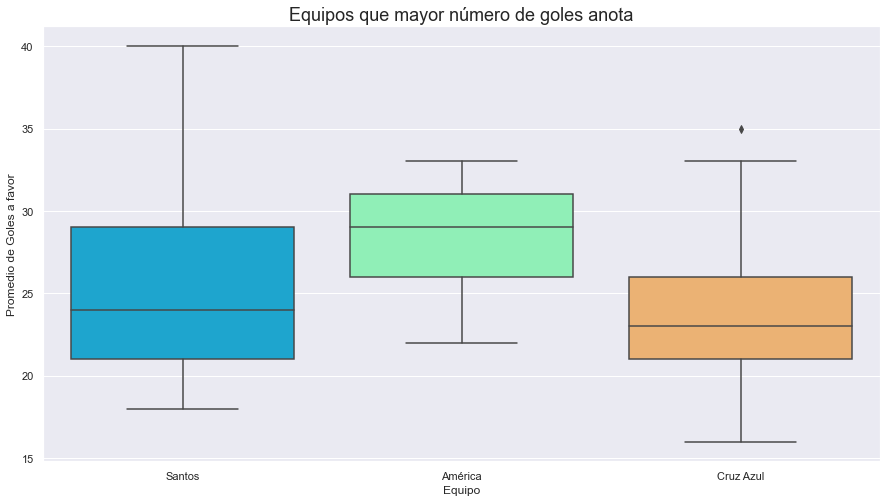

In [24]:
# Posición por jornada
sns.set(rc={'figure.figsize': (15, 8)})
ax = sns.boxplot(x='Equipo', y='GF', data=df3_g, palette='rainbow')
ax.set_title('Equipos que mayor número de goles anota', fontsize=18)
ax.set(xlabel='Equipo', ylabel="Promedio de Goles a favor");

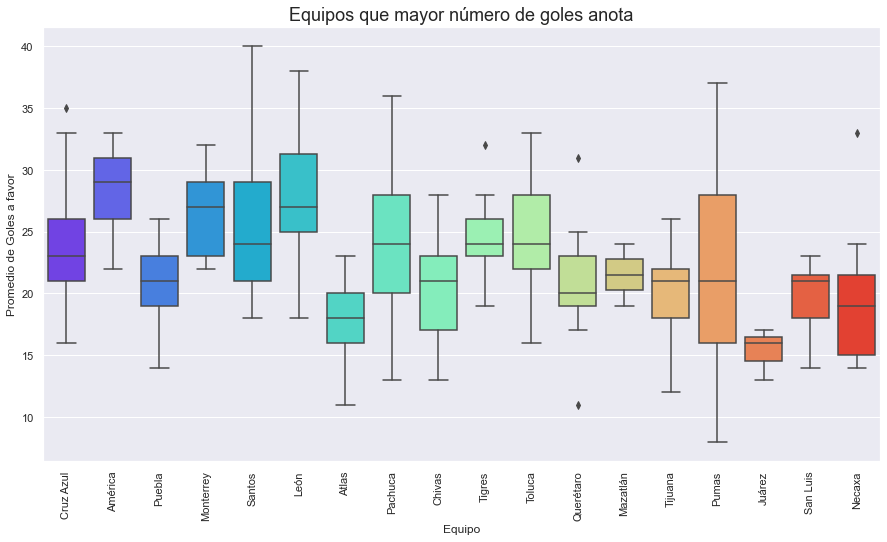

In [28]:
sns.set(rc={'figure.figsize': (15, 8)})
ax = sns.boxplot(x='Equipo', y='GF', data=df3_vig, palette='rainbow')
ax.set_title('Equipos que mayor número de goles anota', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
ax.set(xlabel='Equipo', ylabel="Promedio de Goles a favor")
fig = ax.get_figure()
fig.savefig("MasGoles.png");

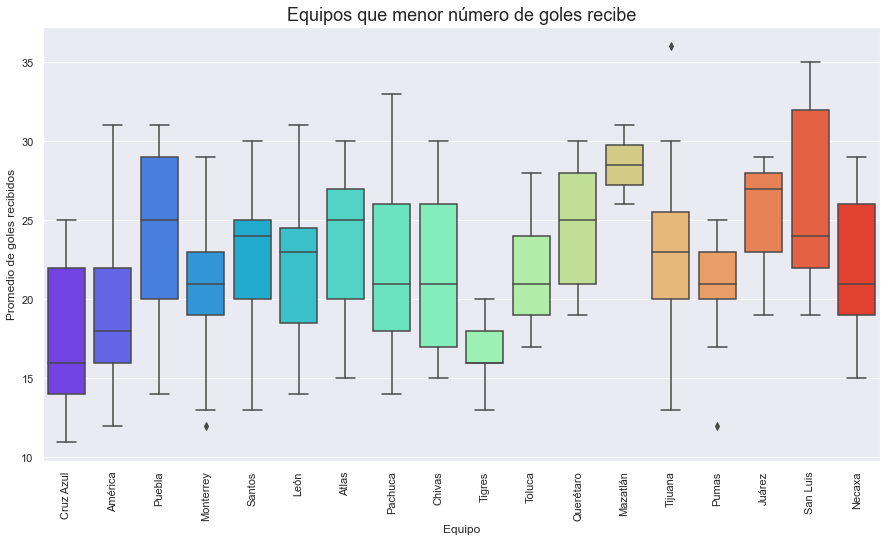

In [197]:
sns.set(rc={'figure.figsize': (15, 8)})
ax = sns.boxplot(x='Equipo', y='GC', data=df3_vig, palette='rainbow')
ax.set_title('Equipos que menor número de goles recibe', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
ax.set(xlabel='Equipo', ylabel="Promedio de goles recibidos");

In [171]:
df3_order = df3_vig.groupby('Equipo')['GF'].mean().reset_index().sort_values(by='GF', ascending=False)
df3_order

,Equipo,GF
0,América,28.307692
5,León,28.000000
7,Monterrey,26.307692
14,Santos,25.538462
17,Toluca,25.000000
15,Tigres,24.615385
3,Cruz Azul,24.153846
9,Pachuca,23.923077
6,Mazatlán,21.500000
11,Pumas,21.230769


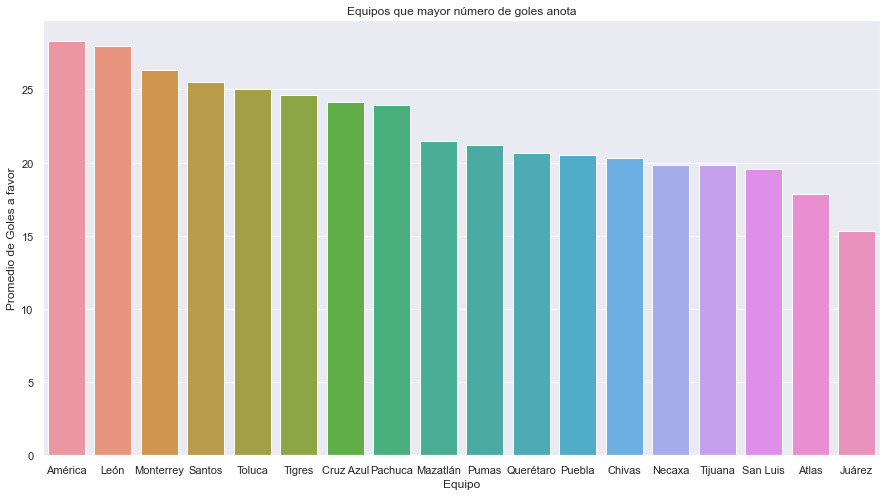

In [199]:
# Median Steps by Month_encoded
sns.set(rc={'figure.figsize': (15, 8)})
ax = sns.barplot(x='Equipo', y='GF', data=df3_order)
ax.set_title('Equipos que mayor número de goles anota')
ax.set(xlabel='Equipo', ylabel="Promedio de Goles a favor");

In [201]:
df3_order = df3_vig.groupby('Equipo')['GC'].mean().reset_index().sort_values(by='GC')
df3_order

,Equipo,GC
15,Tigres,16.538462
3,Cruz Azul,17.461538
0,América,19.076923
7,Monterrey,20.461538
11,Pumas,20.846154
2,Chivas,21.769231
17,Toluca,21.846154
5,León,22.000000
8,Necaxa,22.142857
14,Santos,22.384615


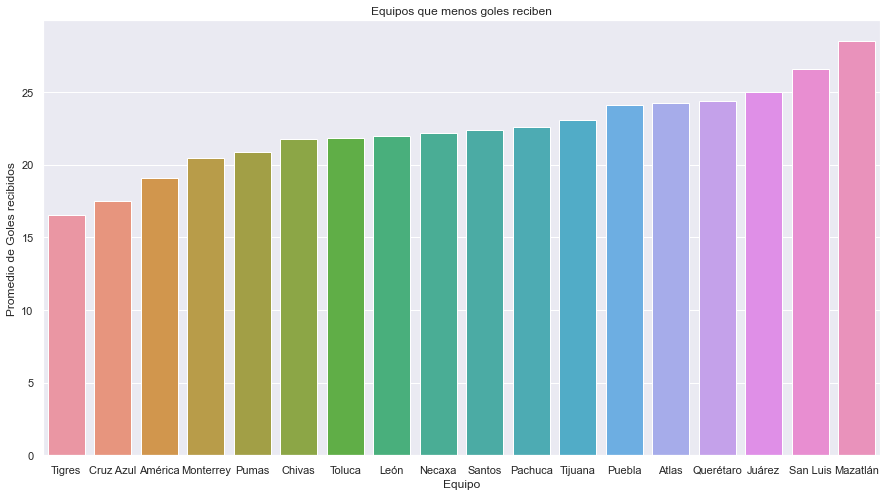

In [202]:
sns.set(rc={'figure.figsize': (15, 8)})
ax = sns.barplot(x='Equipo', y='GC', data=df3_order)
ax.set_title('Equipos que menos goles reciben')
ax.set(xlabel='Equipo', ylabel="Promedio de Goles recibidos");

In [29]:
equipos_analisis = ['Cruz Azul']
df3_g = df3_vig.loc[df3_vig['Equipo'].isin(equipos_analisis)].sort_values(by='Temporada')
df3_g

,Temporada,Año,Posicion,Equipo,Puntos,PJ,PG,PE,PP,GF,GC,GT
219,2009-2010,2009,3,Cruz Azul,33,17,11,0,6,35,19,54
199,2010-2011,2010,1,Cruz Azul,39,17,12,3,2,33,13,46
182,2011-2012,2011,2,Cruz Azul,29,17,8,5,4,21,14,35
168,2012-2013,2012,6,Cruz Azul,26,17,6,8,3,22,15,37
148,2013-2014,2013,4,Cruz Azul,29,17,8,5,4,21,17,38
139,2014-2015,2014,13,Cruz Azul,21,17,5,6,6,16,15,31
122,2015-2016,2015,14,Cruz Azul,20,17,5,5,7,19,25,44
104,2016-2017,2016,14,Cruz Azul,19,17,4,7,6,25,23,48
78,2017-2018,2017,6,Cruz Azul,27,17,7,6,4,22,22,44
55,2018-2019,2018,1,Cruz Azul,36,17,11,3,3,26,13,39


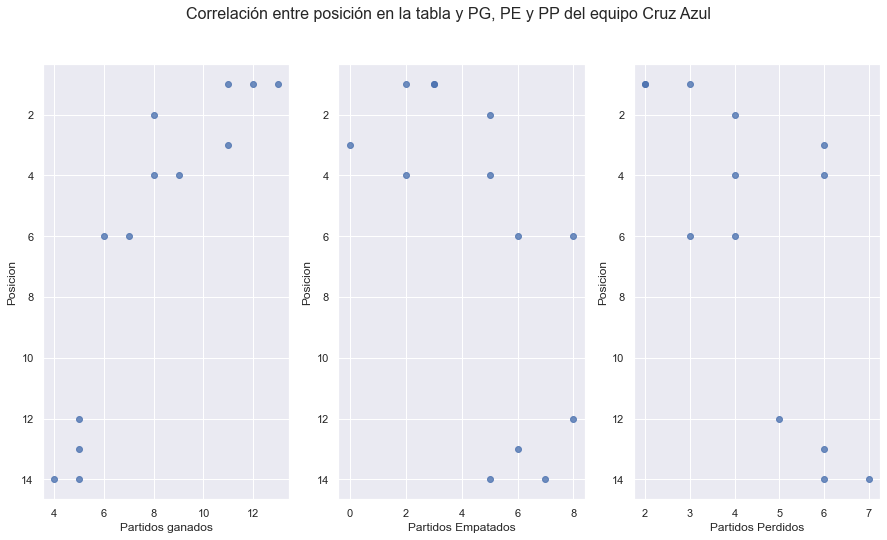

In [32]:
cols = ['PG','PE','PP','Posicion']
titles = ['Partidos ganados','Partidos Empatados','Partidos Perdidos']
df = df3_g[cols]
fig, axes = plt.subplots(figsize = (15,8), nrows = 1, ncols = 3)
fig.suptitle('Correlación entre posición en la tabla y PG, PE y PP del equipo Cruz Azul', fontsize=16)
for i in range(3):
    plt.sca(axes[i])
    plt.scatter(df.iloc[:,i],df['Posicion'], alpha = 0.8)
    plt.xlabel(titles[i])
    plt.gca().invert_yaxis()
    plt.ylabel('Posicion')
plt.savefig("Correlacion Cruz Azul.png");    

In [237]:
df3_vig

,Temporada,Año,Posicion,Equipo,Puntos,PJ,PG,PE,PP,GF,GC,GT
0,2021-2022,2021,1,Cruz Azul,41,17,13,2,2,26,11,37
1,2021-2022,2021,2,América,38,17,12,2,3,26,14,40
2,2021-2022,2021,3,Puebla,28,17,7,7,3,25,14,39
3,2021-2022,2021,4,Monterrey,28,17,8,4,5,22,13,35
4,2021-2022,2021,5,Santos,26,17,7,5,5,18,13,31
...,...,...,...,...,...,...,...,...,...,...,...,...
227,2009-2010,2009,11,San Luis,21,17,5,6,6,21,24,45
229,2009-2010,2009,13,Chivas,19,17,5,4,8,23,29,52
231,2009-2010,2009,15,Atlas,18,17,5,3,9,14,25,39
232,2009-2010,2009,16,Querétaro,18,17,5,3,9,17,29,46


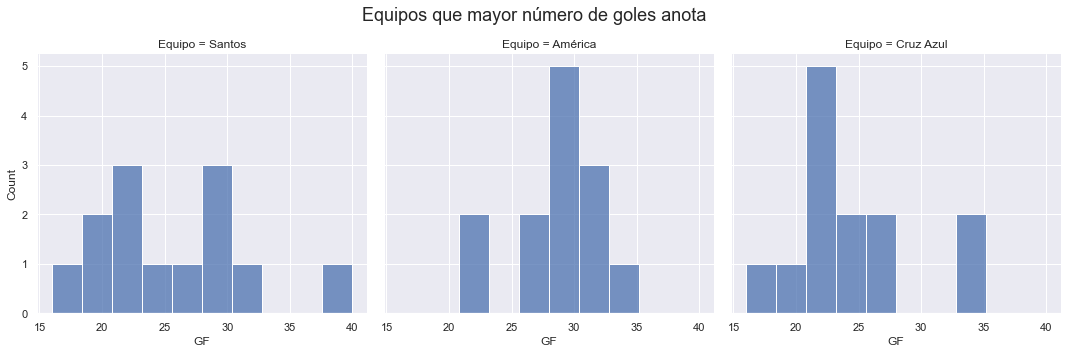

In [35]:
equipos_analisis = ['Santos','América','Cruz Azul']
df3_g = df3_vig.loc[df3_vig['Equipo'].isin(equipos_analisis)].sort_values(by='Temporada')
sns.set(rc={'figure.figsize': (16, 8)})
ax = sns.displot(df3_g, x='GF', col="Equipo", bins=10, kde=False, multiple='dodge')
ax.fig.subplots_adjust(top=0.85)
ax.fig.suptitle('Equipos que mayor número de goles anota', fontsize=18)
ax.fig.savefig("EquiposMasGoles.png");


In [288]:
df3_vig.to_csv('./datasets/liga_mx_temporadas.csv')